In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from glob import glob
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
#root_dir = "D:/data/NEU Metal Surface Defects Data"
root_dir = 'C:/Users/poscoedu_ph/AI 기초/data/NEU Metal Surface Defects Data'
os.listdir(root_dir + '/train')

os.listdir(root_dir + '/train/Inclusion')

['In_120.bmp',
 'In_121.bmp',
 'In_122.bmp',
 'In_123.bmp',
 'In_124.bmp',
 'In_125.bmp',
 'In_126.bmp',
 'In_127.bmp',
 'In_128.bmp',
 'In_129.bmp',
 'In_13.bmp',
 'In_130.bmp',
 'In_131.bmp',
 'In_132.bmp',
 'In_133.bmp',
 'In_134.bmp',
 'In_135.bmp',
 'In_136.bmp',
 'In_137.bmp',
 'In_138.bmp',
 'In_139.bmp',
 'In_14.bmp',
 'In_140.bmp',
 'In_141.bmp',
 'In_142.bmp',
 'In_143.bmp',
 'In_144.bmp',
 'In_145.bmp',
 'In_146.bmp',
 'In_147.bmp',
 'In_148.bmp',
 'In_149.bmp',
 'In_15.bmp',
 'In_150.bmp',
 'In_151.bmp',
 'In_152.bmp',
 'In_153.bmp',
 'In_154.bmp',
 'In_155.bmp',
 'In_156.bmp',
 'In_157.bmp',
 'In_158.bmp',
 'In_159.bmp',
 'In_16.bmp',
 'In_160.bmp',
 'In_161.bmp',
 'In_162.bmp',
 'In_163.bmp',
 'In_164.bmp',
 'In_165.bmp',
 'In_166.bmp',
 'In_167.bmp',
 'In_168.bmp',
 'In_169.bmp',
 'In_17.bmp',
 'In_170.bmp',
 'In_171.bmp',
 'In_172.bmp',
 'In_173.bmp',
 'In_174.bmp',
 'In_175.bmp',
 'In_176.bmp',
 'In_177.bmp',
 'In_178.bmp',
 'In_179.bmp',
 'In_18.bmp',
 'In_180.bmp',
 

In [5]:
train_dir = root_dir + '/train'
val_dir = root_dir + '/valid'
test_dir = root_dir + '/test'

labels = os.listdir(train_dir)
labels

['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']

In [6]:
for label in labels:
    print('{}:{}개'.format(label,len(os.listdir(train_dir+'/'+label ))))

Crazing:276개
Inclusion:276개
Patches:276개
Pitted:276개
Rolled:276개
Scratches:276개


C:/Users/poscoedu_ph/AI 기초/data/NEU Metal Surface Defects Data/train/Crazing/Cr_120.bmp
Cr_120.bmp


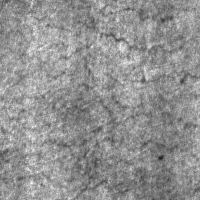

In [7]:
img_file_list = os.listdir(train_dir+"/"+labels[0]+"/") # crazing 파일 리스트 
img_file = train_dir+"/"+labels[0]+"/"+img_file_list[0] # 1번째 사진
image_pil = Image.open(img_file)
print(image_pil.filename)
print(image_pil.filename.split('/')[-1])
image_pil

In [8]:
image = np.array(image_pil)
print(image.shape)
image

(200, 200)


array([[141, 131, 126, ..., 149, 158, 172],
       [106, 125, 114, ..., 149, 158, 194],
       [118, 113,  82, ..., 163, 159, 175],
       ...,
       [167, 176, 145, ..., 146, 139, 125],
       [131, 146, 152, ..., 139, 140, 139],
       [122, 139, 140, ..., 148, 150, 122]], dtype=uint8)

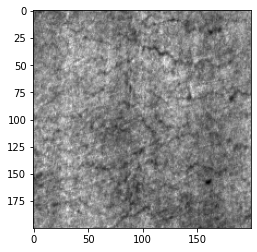

In [9]:
plt.imshow(image, "gray")
plt.show()

Cr_120.bmp


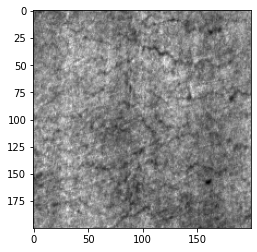

In_120.bmp


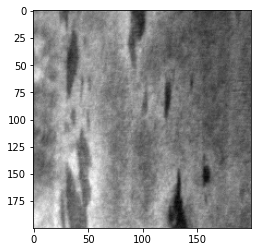

Pa_120.bmp


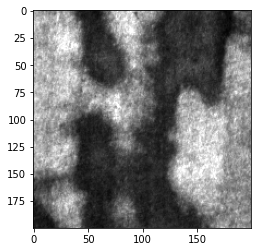

PS_120.bmp


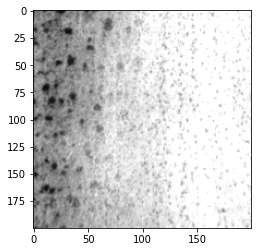

RS_120.bmp


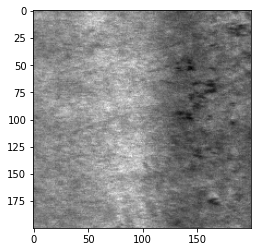

Sc_120.bmp


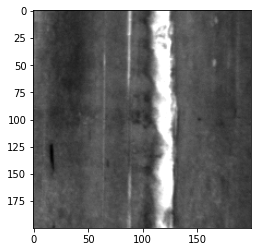

In [10]:
# Defects 클래스별 첫번째 이미지 확인

for label in labels:
    img_file_list = os.listdir(train_dir+"/"+label+"/")
    img_file = train_dir+"/"+label+"/"+img_file_list[0]
    image_pil = Image.open(img_file)
    image = np.array(image_pil)
    print(image_pil.filename.split('/')[-1]) 
    plt.imshow(image, "gray")
    plt.show()

In [11]:
# 이미지를 ndarray 묶음으로 변환

# 입력 데이터를 ndarray로 변환하는 사용자 함수 선언

def makeTrainData(image_dir):
    x_list = None
    y_list = None
    cnt = 0
    
    for label_no, label_dir in enumerate(os.listdir(image_dir)):
        for file in os.listdir(image_dir + "/" + label_dir):
            cnt += 1
            print("처리중...({})".format(cnt), end="\r") # im 다른 모드 변환 이미지반환(RGB, CMYK, L(256단계 흑백 이미지), 1(단색 이미지)
            this_img = np.array(Image.open(image_dir + "/" + label_dir + "/" + file).convert("RGB"))
            this_img = np.expand_dims(this_img, axis=0) # 1번째 축에 차원 추가
            if x_list is None:
                x_list = this_img
            else:
                x_list = np.vstack([x_list, this_img])
                
            this_label = np.zeros(shape=(1,6))
            this_label[0, label_no] = 1
            if y_list is None:
                y_list = this_label
            else:
                y_list = np.vstack([y_list, this_label])
    
    x_list =x_list / 255.  # 데이터 정규화
    return x_list, y_list 

In [12]:
x_train, y_train = makeTrainData(train_dir)
x_train.shape, y_train.shape

((1656, 200, 200, 3), (1656, 6))

In [13]:
x_val, y_val = makeTrainData(val_dir)
x_val.shape, y_val.shape

((72, 200, 200, 3), (72, 6))

In [18]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [19]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200,200),
    batch_size=10,
    class_mode='categorical'
)
len(train_generator)

Found 1656 images belonging to 6 classes.


166

2 (10, 200, 200, 3) (10, 6)


c:\Users\poscouser\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


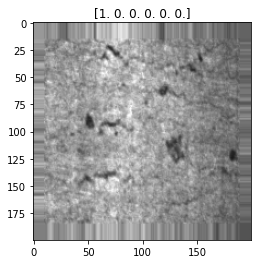

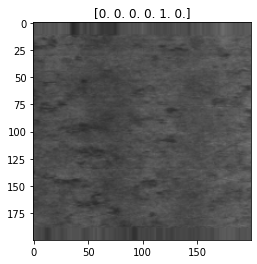

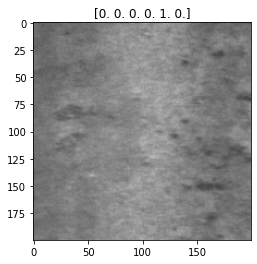

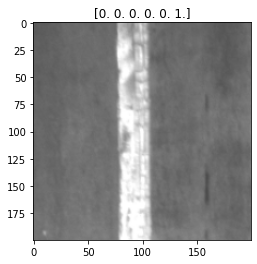

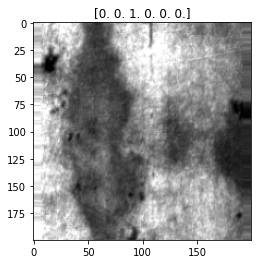

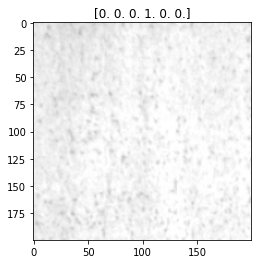

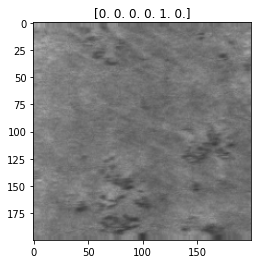

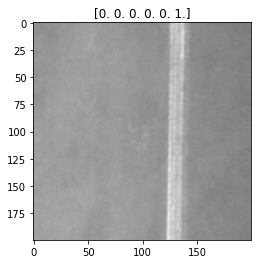

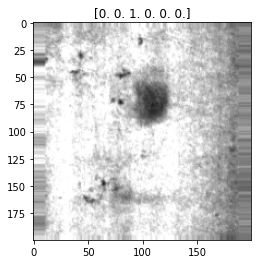

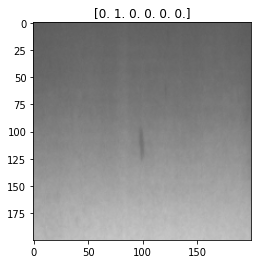

In [23]:
for datas in train_generator:
    imgs = datas[0]
    labels = datas[1]
    print(len(datas), imgs.shape, labels.shape)
    for idx,img in enumerate(imgs):
        plt.title(labels[idx])
        plt.imshow(img, 'gray')
        plt.show()
    break

In [24]:
val_datagen = ImageDataGenerator(rescale=1./255)

validataion_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(200,200),
    batch_size=10,
    class_mode='categorical'
)
len(validataion_generator)

Found 72 images belonging to 6 classes.


8

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(200,200,3), kernel_size=(3,3),filters=32, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 80000)             0

In [ ]:
32*3*3*64+64

18496

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train, epochs=25, batch_size=32, validation_data=(x_val,y_val))

Epoch 1/25
52/52 [==============================] - 7s 58ms/step - loss: 1.7741 - accuracy: 0.2880 - val_loss: 1.2610 - val_accuracy: 0.3472
Epoch 2/25
52/52 [==============================] - 2s 44ms/step - loss: 0.9783 - accuracy: 0.5984 - val_loss: 0.7596 - val_accuracy: 0.6667
Epoch 3/25
52/52 [==============================] - 2s 42ms/step - loss: 0.6849 - accuracy: 0.7434 - val_loss: 0.4525 - val_accuracy: 0.8750
Epoch 4/25
52/52 [==============================] - 2s 42ms/step - loss: 0.6117 - accuracy: 0.7820 - val_loss: 0.3449 - val_accuracy: 0.9167
Epoch 5/25
52/52 [==============================] - 2s 43ms/step - loss: 0.3361 - accuracy: 0.8798 - val_loss: 0.1856 - val_accuracy: 0.9306
Epoch 6/25
52/52 [==============================] - 2s 43ms/step - loss: 0.2936 - accuracy: 0.8931 - val_loss: 0.1804 - val_accuracy: 0.9306
Epoch 7/25
52/52 [==============================] - 2s 42ms/step - loss: 0.1811 - accuracy: 0.9348 - val_loss: 0.1844 - val_accuracy: 0.9306
Epoch 8/25
52

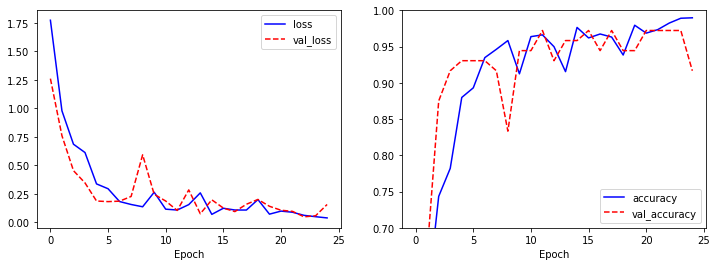

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'b-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()

plt.show()

In [ ]:
save_path = 'my_model.h5'
model.save(save_path, include_optimizer=True)

In [ ]:
# 모델 블러오기 
model = tf.keras.models.load_model('my_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 80000)             0

In [ ]:
img_file_list = os.listdir(test_dir+"/"+labels[0]+"/")
img_file_list

['Cr_1.bmp',
 'Cr_10.bmp',
 'Cr_100.bmp',
 'Cr_101.bmp',
 'Cr_102.bmp',
 'Cr_103.bmp',
 'Cr_104.bmp',
 'Cr_105.bmp',
 'Cr_106.bmp',
 'Cr_107.bmp',
 'Cr_108.bmp',
 'Cr_109.bmp']

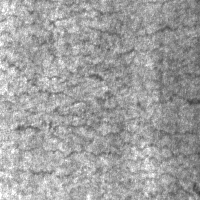

In [ ]:
img_file = test_dir+"/"+labels[0]+"/"+img_file_list[0]
image_pil = Image.open(img_file).convert("RGB") #컬러 이미지로 불러오기
image_pil

In [ ]:
print(img_file)

C:/Users/poscoedu_ph/AI 기초/data/NEU Metal Surface Defects Data/test/Crazing/Cr_1.bmp


[[9.9992335e-01 4.2219228e-10 3.7490900e-05 2.3804272e-05 1.4621551e-05
  7.0960436e-07]]
0
99.99


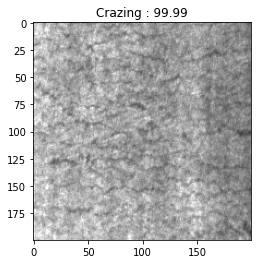

In [ ]:
img = np.array(image_pil)   # array로 변환
img = img / 255.            #0~1 사이로 리스케일링
img = img[tf.newaxis, ...]  #앞쪽에 배열 추가,  1,200,200,3 
img

pred = model.predict(img)   #모델을 활용하여 img 예측, pred는 6개 클래스에 대한 확률값
print(pred)

classes = np.argmax(pred)  # 가장 확률이 높은 인덱스(라벨) 확인해 classes 변수에 저장
print(classes)

confidence = round(np.max(pred) * 100, 2) # 확률값 100% 기준으로 계산
print(confidence)

names = labels[classes]  # 예측한 라벨을 names에 저장
title = "{} : {}".format(names, confidence)
plt.title(title)
# plt.imshow(img, "gray")   # 에러 => imshow 입력데이터는 (행,열,차원(컬러/흑백)) 구조를 가지므로 (1,200,200,3)  중 1을 제외해야 함
plt.imshow(np.squeeze(img), "gray")  #200,200 이미지 출력,,, np.squeeze()함수는 크기가 1인 axis 제거하여 (200,200,3) 으로 변경
plt.show()

In [ ]:
test_file_list = []

for dir in os.listdir(test_dir):
    for idx, file in enumerate(os.listdir(test_dir+'/'+dir)):
        if idx < 4:
            test_file_list.append(test_dir+'/'+dir+'/'+file)

print(len(test_file_list))
test_file_list

24


['C:/Users/poscoedu_ph/AI 기초/data/NEU Metal Surface Defects Data/test/Crazing/Cr_1.bmp',
 'C:/Users/poscoedu_ph/AI 기초/data/NEU Metal Surface Defects Data/test/Crazing/Cr_10.bmp',
 'C:/Users/poscoedu_ph/AI 기초/data/NEU Metal Surface Defects Data/test/Crazing/Cr_100.bmp',
 'C:/Users/poscoedu_ph/AI 기초/data/NEU Metal Surface Defects Data/test/Crazing/Cr_101.bmp',
 'C:/Users/poscoedu_ph/AI 기초/data/NEU Metal Surface Defects Data/test/Inclusion/In_1.bmp',
 'C:/Users/poscoedu_ph/AI 기초/data/NEU Metal Surface Defects Data/test/Inclusion/In_10.bmp',
 'C:/Users/poscoedu_ph/AI 기초/data/NEU Metal Surface Defects Data/test/Inclusion/In_100.bmp',
 'C:/Users/poscoedu_ph/AI 기초/data/NEU Metal Surface Defects Data/test/Inclusion/In_101.bmp',
 'C:/Users/poscoedu_ph/AI 기초/data/NEU Metal Surface Defects Data/test/Patches/Pa_1.bmp',
 'C:/Users/poscoedu_ph/AI 기초/data/NEU Metal Surface Defects Data/test/Patches/Pa_10.bmp',
 'C:/Users/poscoedu_ph/AI 기초/data/NEU Metal Surface Defects Data/test/Patches/Pa_100.bmp',


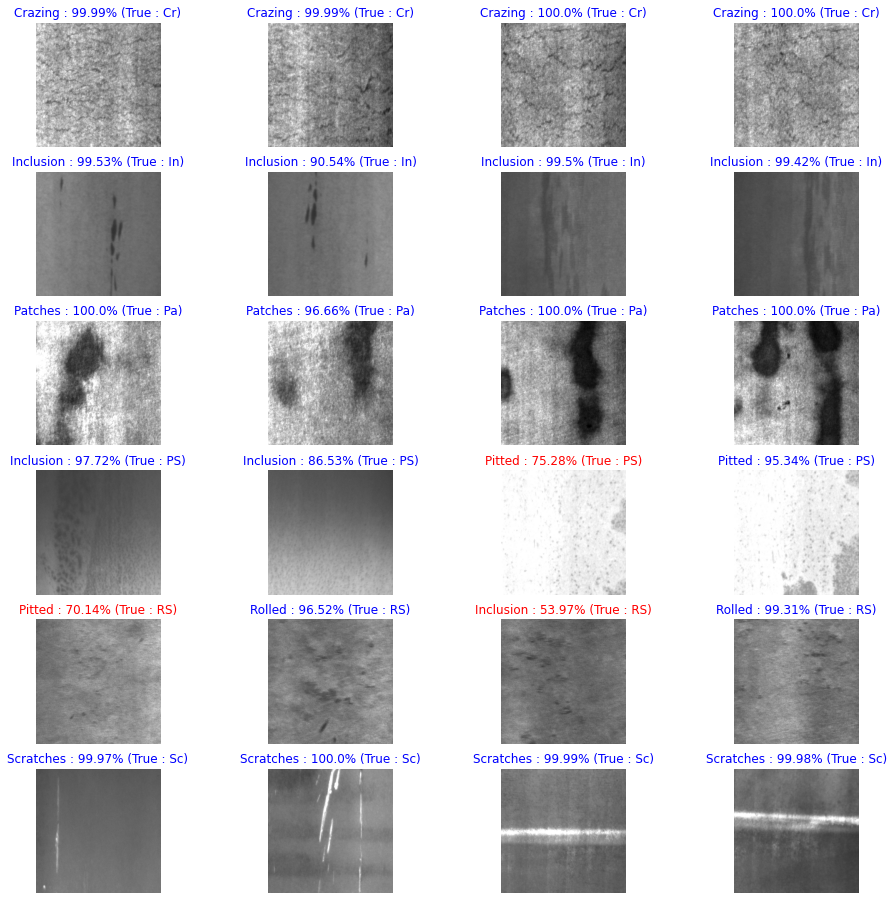

In [ ]:
i = 1
plt.figure(figsize=(16,16))

for file in test_file_list:
    image_pil = Image.open(file).convert('RGB')
    img = np.array(image_pil) / 255.
    img = img[tf.newaxis, ...]
    pred = model.predict(img)
    classes = np.argmax(pred)
    confidence = round(np.max(pred)*100, 2)
    name = labels[classes]
    title = "{} : {}% (True : {})".format(name, confidence, file.split('/')[-1].split('_')[0])

    plt.subplot(6,4,i)

    if confidence < 80:
        plt.title(title, color='red')
    else:
        plt.title(title, color='blue')
    plt.axis('off')
    plt.imshow(np.squeeze(img),'gray')
    i += 1

plt.show()